# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as set_sns_style
from statsmodels.tsa.arima.model import ARIMA
import warnings
from datetime import datetime

# --- Setup ---
warnings.filterwarnings("ignore")
set_sns_style.set(style='darkgrid')
print("Libraries imported and style set.")

# This dictionary will hold our findings
analytics_findings = {}
plot_filenames = []
final_output = {}

Libraries imported and style set.


# 2. Load Data

In [2]:
df_history = pd.read_csv('TCS_stock_history.csv')
df_action = pd.read_csv('TCS_stock_action.csv')
df_info = pd.read_csv('TCS_stock_info.csv', header=None, index_col=0, names=['Value'])
print("All data files loaded successfully.")

All data files loaded successfully.


#3. Process Data

In [3]:
df_history['Date'] = pd.to_datetime(df_history['Date'])
df_history.set_index('Date', inplace=True)
df_history.sort_index(inplace=True)
df_action['Date'] = pd.to_datetime(df_action['Date'])
company_info = df_info.squeeze('columns').to_dict()
company_info_cleaned = {k: (v if pd.notna(v) else None) for k, v in company_info.items()}
final_output['company_info'] = company_info_cleaned
print("Data processing complete.")

Data processing complete.


# 4. Objectives, Findings and Plots

## Objective 1: Analyze Historical Price Trend

Objective 1: Analyzing historical price trend...


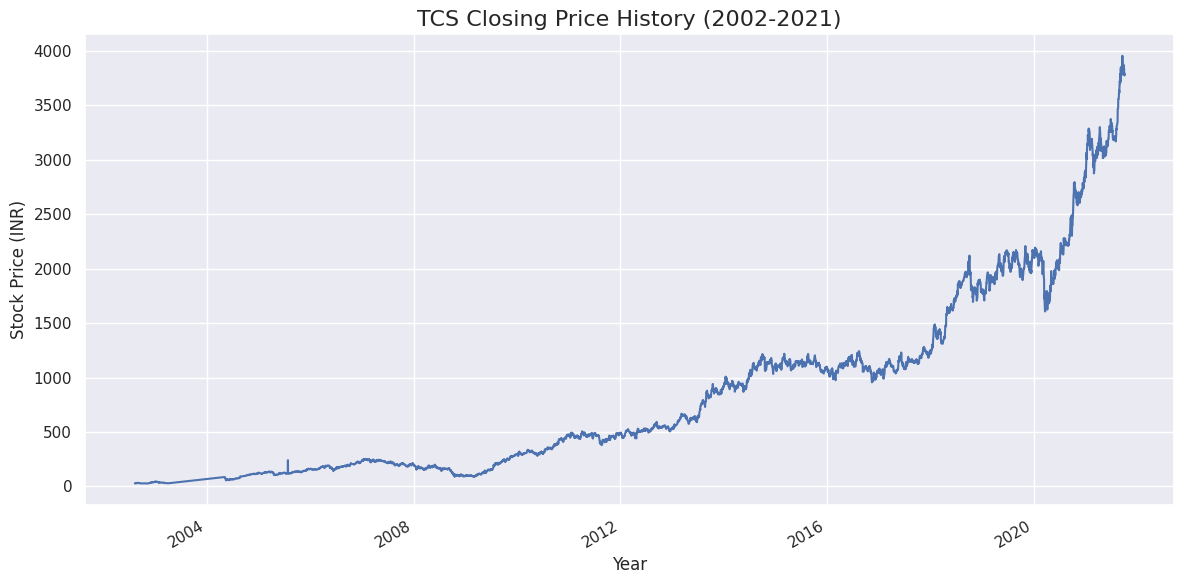

In [4]:
print("Objective 1: Analyzing historical price trend...")
plt.figure(figsize=(12, 6))
df_history['Close'].plot()
plt.title('TCS Closing Price History (2002-2021)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price (INR)')
plt.tight_layout()
plot_1_name = 'plot_1_price_history.png'
plt.savefig(plot_1_name)
plot_filenames.append(plot_1_name)
analytics_findings['objective_1_price_trend'] = "The stock has shown significant long-term growth, starting from a low price in 2002 and rising to its peak in 2021. This indicates strong historical performance and market confidence."

## Objective 2: Analyzing stock volatility

Objective 2: Analyzing stock volatility...


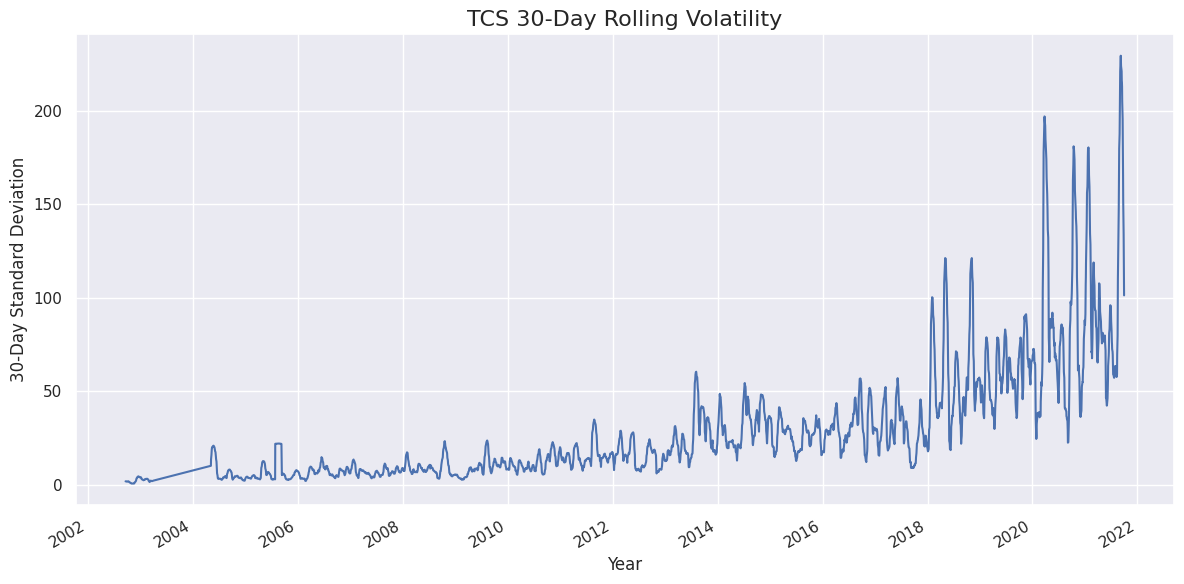

In [5]:
print("Objective 2: Analyzing stock volatility...")
df_history['Volatility_30D'] = df_history['Close'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
df_history['Volatility_30D'].plot()
plt.title('TCS 30-Day Rolling Volatility', fontsize=16)
plt.xlabel('Year')
plt.ylabel('30-Day Standard Deviation')
plt.tight_layout()
plot_2_name = 'plot_2_volatility.png'
plt.savefig(plot_2_name)
plot_filenames.append(plot_2_name)
analytics_findings['objective_2_volatility'] = "Volatility is not constant. There are clear spikes during major market events, such as the 2008 financial crisis and the 2020 COVID-19 pandemic. However, the overall volatility has been relatively managed, considering the high growth."

## Objective 3: Evaluating trading volume

Objective 3: Evaluating trading volume...


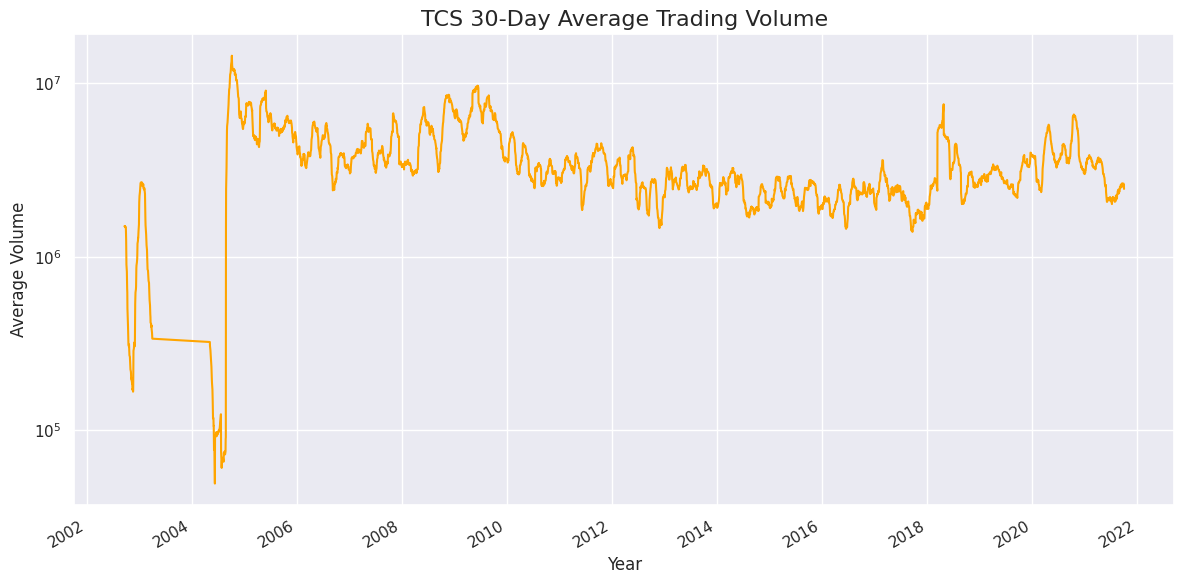

In [6]:
print("Objective 3: Evaluating trading volume...")
df_history['Volume_30D_Avg'] = df_history['Volume'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
df_history['Volume_30D_Avg'].plot(color='orange')
plt.title('TCS 30-Day Average Trading Volume', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.yscale('log') # Use log scale as volume changes are massive
plt.tight_layout()
plot_3_name = 'plot_3_volume_history.png'
plt.savefig(plot_3_name)
plot_filenames.append(plot_3_name)
analytics_findings['objective_3_volume'] = "Trading volume has significantly increased over the decades, indicating growing liquidity and investor interest. Spikes in volume often correspond to periods of high volatility and major price movements."

## Objective 4: Analyzing corporate actions

### 4a: Dividends

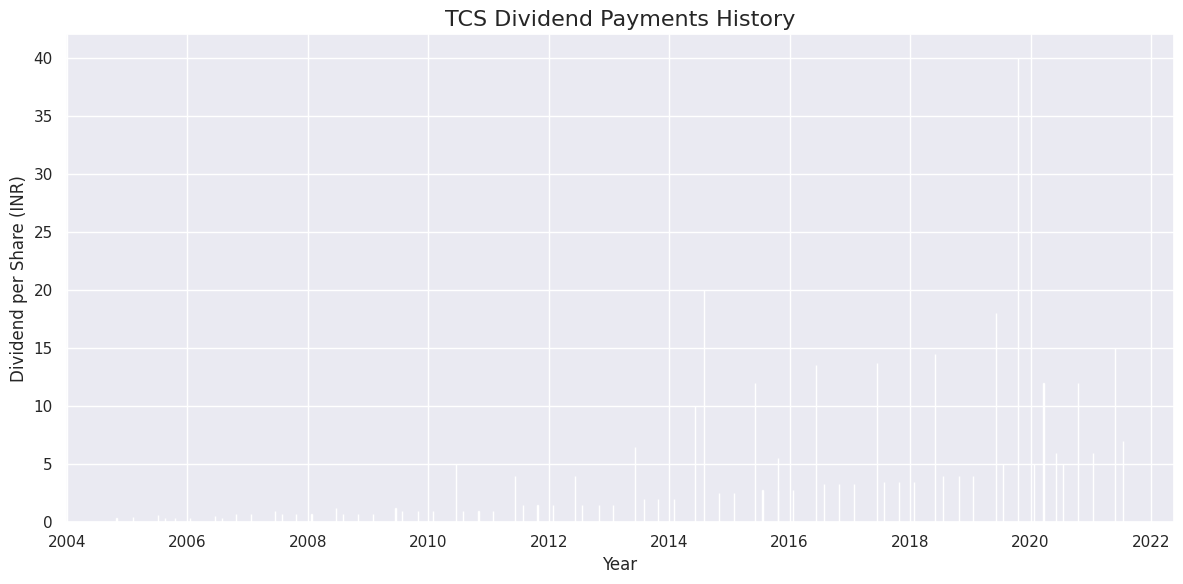

In [7]:
dividends_data = df_action[df_action['Dividends'] > 0]
plt.figure(figsize=(12, 6))
plt.bar(dividends_data['Date'], dividends_data['Dividends'])
plt.title('TCS Dividend Payments History', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dividend per Share (INR)')
plt.tight_layout()
plot_4a_name = 'plot_4a_dividends.png'
plt.savefig(plot_4a_name)
plot_filenames.append(plot_4a_name)

### 4b: Stock Splits

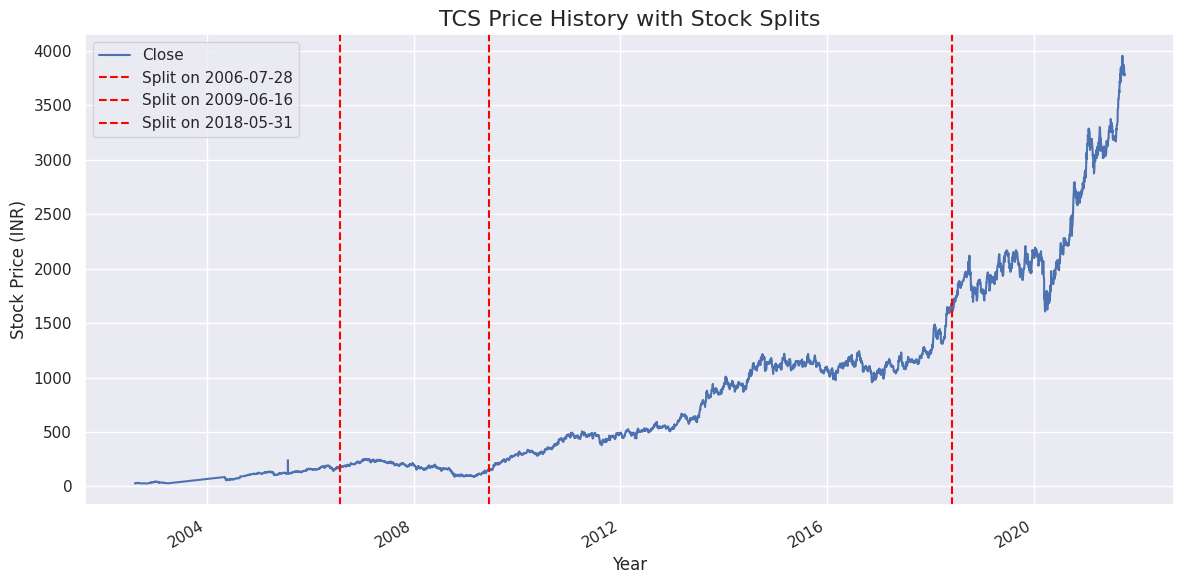

In [8]:
splits_data = df_action[df_action['Stock Splits'] > 0]
plt.figure(figsize=(12, 6))
df_history['Close'].plot()
for split_date in splits_data['Date']:
    plt.axvline(x=split_date, color='red', linestyle='--', label=f"Split on {split_date.date()}")
plt.title('TCS Price History with Stock Splits', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.tight_layout()
plot_4b_name = 'plot_4b_splits.png'
plt.savefig(plot_4b_name)
plot_filenames.append(plot_4b_name)
analytics_findings['objective_4_corporate_actions'] = "TCS has a strong and consistent history of rewarding shareholders, as seen in the regular dividend payments. Stock splits were performed (e.g., in 2006, 2009, 2018) to increase liquidity and make the stock more accessible to retail investors. These splits are clearly visible on the price chart."

## Objective 5: Forecast Future Price Movements

Objective 5: Forecasting future price...


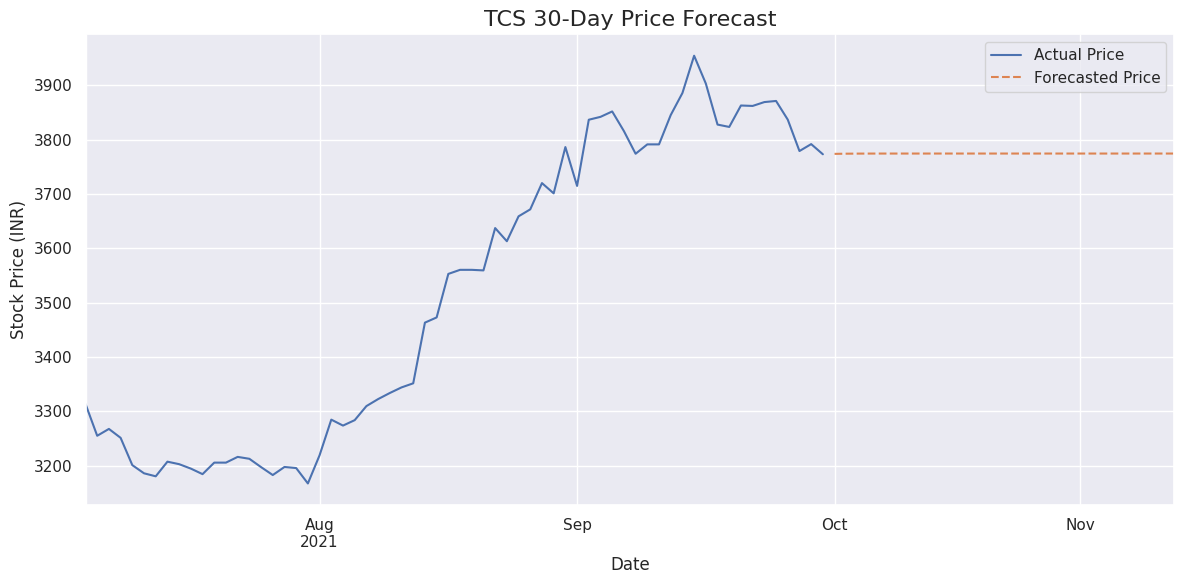

In [9]:
print("Objective 5: Forecasting future price...")
model_data = df_history['Close'].asfreq('B') # 'B' for business day frequency
model_data = model_data.ffill() # Forward fill any missing business days

model = ARIMA(model_data, order=(1, 1, 1))
model_fit = model.fit()
forecast_result = model_fit.forecast(steps=30)

forecast_30day = {date.strftime('%Y-%m-%d'): round(value, 2) for date, value in forecast_result.items()}
final_output['forecast_30day'] = forecast_30day

plt.figure(figsize=(12, 6))
# Plot last 90 days of actual data
model_data.last('90D').plot(label='Actual Price')
# Plot the 30-day forecast
forecast_result.plot(label='Forecasted Price', linestyle='--')
plt.title('TCS 30-Day Price Forecast', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.tight_layout()
plot_5_name = 'plot_5_forecast.png'
plt.savefig(plot_5_name)
plot_filenames.append(plot_5_name)

analytics_findings['objective_5_forecast'] = f"A 30-day forecast using a simple ARIMA model predicts a price movement from {round(model_data.iloc[-1], 2)} to {round(forecast_result.iloc[-1], 2)}. This provides a short-term outlook on potential price direction."

# 5. Consolidate All Data into Final JSON

In [10]:
print("Consolidating all findings and data...")

# Add key metrics
latest_date = df_history.index.max()
one_year_ago = latest_date - pd.DateOffset(years=1)
df_last_52_weeks = df_history[df_history.index > one_year_ago]

final_output['key_metrics'] = {
    "latest_close": float(df_history['Close'].iloc[-1]),
    "latest_volume": int(df_history['Volume'].iloc[-1]),
    "latest_date": latest_date.strftime('%Y-%m-%d'),
    "all_time_high": float(df_history['High'].max()),
    "all_time_low": float(df_history['Low'].min()),
    "52_week_high": float(df_last_52_weeks['High'].max()),
    "52_week_low": float(df_last_52_weeks['Low'].min())
}

# Add findings and plot list
final_output['analytics_findings'] = analytics_findings
final_output['plot_filenames'] = plot_filenames

# Add raw data for web app charting
final_output['historical_data_close'] = {
    date.strftime('%Y-%m-%d'): round(price, 2)
    for date, price in df_history['Close'].items()
}
final_output['stock_actions'] = {
    "dividends": df_action[df_action['Dividends'] > 0][['Date', 'Dividends']].to_dict('records'),
    "splits": df_action[df_action['Stock Splits'] > 0][['Date', 'Stock Splits']].to_dict('records')
}
# Convert dates in stock_actions to strings for JSON
for action_type in final_output['stock_actions']:
    for item in final_output['stock_actions'][action_type]:
        item['Date'] = item['Date'].strftime('%Y-%m-%d')

Consolidating all findings and data...


# 6. Save to JSON File

In [11]:
# --- Step 5: Save to JSON File ---
output_filename = 'tcs_stock_analysis.json'
with open(output_filename, 'w') as f:
    json.dump(final_output, f, indent=4)

print(f"\n--- SUCCESS! ---")
print(f"Analysis complete. All data and findings saved to '{output_filename}'.")
print("Generated plots:")
for f in plot_filenames:
    print(f"- {f}")


--- SUCCESS! ---
Analysis complete. All data and findings saved to 'tcs_stock_analysis.json'.
Generated plots:
- plot_1_price_history.png
- plot_2_volatility.png
- plot_3_volume_history.png
- plot_4a_dividends.png
- plot_4b_splits.png
- plot_5_forecast.png


# 7. Print JSON to Console Output

In [12]:
print(f"\n\n--- JSON OUTPUT FOR YOUR WEB APP ---")
print(f"Copy everything below this line and save it as 'tcs_stock_analysis.json'\n")
try:
    with open(output_filename, 'r') as f:
        json_content = f.read()
        print(json_content)
    print(f"\n--- END OF JSON OUTPUT ---")
except Exception as e:
    print(f"Error reading and printing JSON file: {e}")



--- JSON OUTPUT FOR YOUR WEB APP ---
Copy everything below this line and save it as 'tcs_stock_analysis.json'

{
    "company_info": {
        "zip": "400001",
        "sector": "Technology",
        "fullTimeEmployees": "509058",
        "longBusinessSummary": "Tata Consultancy Services Limited provides information technology (IT) and IT enabled services worldwide. The company operates through Banking, Financial Services and Insurance; Manufacturing; Retail and Consumer Business; Communication, Media and Technology; and Others segments. It offers CHROMA, a cloud-based talent management solution; ignio, a cognitive automation software product; TCS iON, an assessment platform; TAP, a procurement offering; TCS MasterCraft, a platform to automate and manage IT processes; Quartz, a blockchain solution; and TCS OmniStore, a commerce platform. The company also provides customer intelligence and insight solutions; Intelligent Urban Exchange, an integrated software to accelerate smart city p